In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Install

In [2]:
cd /content/gdrive/MyDrive/JMSE2022/MoldScan

/content/gdrive/MyDrive/JMSE2022/MoldScan


In [3]:
#!pip install -r requirements.txt

In [4]:
import os
import sys
import torch
need_pytorch3d=False
import datetime
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("1.9") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{torch.__version__[0:5:2]}"
        ])
        !pip install pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  404k    0  404k    0     0   576k      0 --:--:-- --:--:-- --:--:--  576k
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/pytorch3d.git (to revision stable) to /tmp/pip-req-build-clojepsk
  Running command git clone -q https://github.com/facebookresearch/pytorch3d.git /tmp/pip-req-build-clojepsk
  Running command git checkout -q 276c9a8acbfa715f5802f26ec9f4141bde26ecb4
     |████████████████████████████████| 50 kB 3.6 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    s

In [ ]:
!pip install pyntcloud

In [ ]:
!pip install tensorboardX

In [ ]:
#!pip install 'git+https://github.com/facebookresearch/pytorch3d.git'

In [ ]:
import os
import torch
import pandas as pd
from pytorch3d.io import load_obj, save_obj
from pytorch3d.structures import Meshes
from pytorch3d.utils import ico_sphere
from pytorch3d.ops import sample_points_from_meshes
from pytorch3d.loss import (
    chamfer_distance, 
    mesh_edge_loss, 
    mesh_laplacian_smoothing, 
    mesh_normal_consistency,
)
import numpy as np
from tqdm.notebook import tqdm
#%matplotlib notebook 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.rcParams['savefig.dpi'] = 80
#mpl.rcParams['figure.dpi'] = 80

import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F


from pytorch3d import structures
from pyntcloud import PyntCloud
from tensorboardX import SummaryWriter
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Tunning Parameters

In [ ]:
##Tunning Parameters
#Arquitecture
num_points=2048
lay=np.array([[128,128,256,128]])
layD=np.array([[128,128,128,256,num_points*3]])
batch_size=40
momentum = 0.8
n_epochs=10000
wgfv=30
mirror=True
#Learning rate decay
lim=30
lr=5e-4
decay=0.0


## 2500 (Same Dist)

Encoder: [[128 128 256 128]] Decoder: [[ 128  128  128  256 6144]] Batch: 54 Error: 0.00023450942432699616 Best at: 3750 Learnig rate: 0.0001 Mom: 0.8


Encoder: [[128 128 256 128]] Decoder: [[ 128  128  256  512 5376]] Batch: 54 Error: 0.0008749022401843831 Best at: 2113 Learnig rate: 0.0008 Mom: 0.8

Encoder: [[112 112 223 112]] Decoder: [[ 112  112  224  448 5376]] Batch: 54 Error: 0.0016488840590227483 Best at: 1514 Learnig rate: 0.0008 Mom: 0.8

Encoder: [[128 128 256 128]] Decoder: [[ 128  128  128  256 5376]] Batch: 54 Error: 0.0005601023959229678 Best at: 4289 Learnig rate: 0.0008 Mom: 0.8

Encoder: [[128 128 128 128]] Decoder: [[ 128  128  128  256 5376]] Batch: 54 Error: 0.00048184986974320054 Best at: 2979 Learnig rate: 0.0005 Mom: 0.8

Encoder: [[128 128 256 128]] Decoder: [[ 128  128  128  256 5376]] Batch: 54 Error: 0.0002697774026501065 Best at: 4085 Learnig rate: 0.0005 Mom: 0.8

Encoder: [[128 128 256 128]] Decoder: [[ 128  128  128  256 5376]] Batch: 54 Error: 0.00023550525077098428 Best at: 4818 Learnig rate: 0.0001 Mom: 0.8



##5000

Encoder: [[128 128 128 256]] Decoder: [[ 256  256  256  256 6144]] Batch: 54 Error: 0.0006073530269786715 Best at: 4034 Learnig rate: 0.0008 Mom: 0.8

Encoder: [[128 128 128 256]] Decoder: [[ 256  256  256 1024 6144]] Batch: 54 Error: 0.0011540403113467618 Best at: 2170 Learnig rate: 0.0008 Mom: 0.8

Encoder: [[128 128 128 128]] Decoder: [[ 128  128  128  512 6144]] Batch: 54 Error: 0.000614725204592105 Best at: 2000 Learnig rate: 0.0008 Mom: 0.9

Encoder: [[128 128 128 200]] Decoder: [[ 200  200  200  512 6144]] Batch: 54 Error: 0.005404655481688678 Best at: 925 Learnig rate: 0.0008 Mom: 0.9

Encoder: [[128 128 128 256]] Decoder: [[ 256  256  256  512 6144]] Batch: 54 Error: 0.0016455792139749973 Best at: 5875 Learnig rate: 0.0008 Mom: 0.9

Encoder: [[128 128 128 200]] Decoder: [[ 200  200  200  512 6144]] Batch: 54 Error: 0.0009417023179121315 Best at: 5997 Learnig rate: 0.0008 Mom: 0.8

Encoder: [[128 128 128 128]] Decoder: [[ 128  128  128  512 6144]] Batch: 54 Error: 0.0004117264597443864 Best at: 2288 Learnig rate: 0.0008 Mom: 0.8

Encoder: [[128 128 128 150]] Decoder: [[ 150  150  150  512 6144]] Batch: 54 Error: 0.000553630355221685 Best at: 5996 Learnig rate: 0.0008 Mom: 0.8

Encoder: [[ 64 128 128 128]] Decoder: [[ 128  128  128  512 6144]] Batch: 54 Error: 0.0006183564623934216 Best at: 3301 Learnig rate: 0.0008 Mom: 0.8

Encoder: [[128 128 128 128]] Decoder: [[ 128  256  256  512 6144]] Batch: 54 Error: 0.0006703076993580907 Best at: 5997 Learnig rate: 0.0008 Mom: 0.8

Encoder: [[128 128 128 128]] Decoder: [[ 128  128  256  512 6144]] Batch: 54 Error: 0.0007586420493316836 Best at: 2155 Learnig rate: 0.0008 Mom: 0.8

Encoder: [[128 128 256 128]] Decoder: [[ 128  128  256  512 6144]] Batch: 54 Error: 0.0005611877587507479 Best at: 4364 Learnig rate: 0.0008 Mom: 0.8

Encoder: [[128 128 256 128]] Decoder: [[ 128  128  128  512 6144]] Batch: 54 Error: 0.0009625518550164997 Best at: 1547 Learnig rate: 0.0008 Mom: 0.8

Encoder: [[128 128 256 128]] Decoder: [[ 128  256  256  512 6144]] Batch: 54 Error: 0.003713516832794994 Best at: 1238 Learnig rate: 0.0008 Mom: 0.8







**New Chamfler**


Encoder: [[ 64 128 256 128]] Decoder: [[ 128 256 256 256 6144]] Batch: 27 Error: 0.003047877961459259 Best at: 57 Learnig rate: 0.0008 Mom: 0.8

Encoder: [[ 64 128 128 128]] Decoder: [[ 128  128  128  512 6144]] Batch: 54 Error: 0.0008570746089057244 Best at: 2842 Learnig rate: 0.0005 Mom: 0.9

Encoder: [[128 128 128 128]] Decoder: [[ 128  128  128  512 6144]] Batch: 54 Error: 0.0007585802975879713 Best at: 2811 Learnig rate: 0.0005 Mom: 0.9

Encoder: [[128 128 128 256]] Decoder: [[ 256  128  None  512 6144]] Batch: 54 Error: 0.0005059216060484006 Best at: 3314 Learnig rate: 0.0005 Mom: 0.9

Encoder: [[128 128 128 256]] Decoder: [[ 256  256  None  512 6144]] Batch: 54 Error: 0.0019116390158902344 Best at: 1391 Learnig rate: 0.0005 Mom: 0.9

Encoder: [[128 128 128 256]] Decoder: [[ 256  256  256  256 6144]] Batch: 54 Error: 0.0003654866464443537 Best at: 4256 Learnig rate: 0.0005 Mom: 0.9

Encoder: [[128 128 128 200]] Decoder: [[ 200  200  200  512 6144]] Batch: 54 Error: 0.0005407051140616897 Best at: 5339 Learnig rate: 0.0005 Mom: 0.9

Encoder: [[256 128 128 128]] Decoder: [[ 128  128  128 1024 6144]] Batch: 54 Error: 0.0004208544383604858 Best at: 3796 Learnig rate: 0.0005 Mom: 0.9

Encoder: [[128 128 128 200]] Decoder: [[ 200  200  200  512 6144]] Batch: 27 Error: 0.0007155995418080968 Best at: 863 Learnig rate: 0.0005 Mom: 0.8

Encoder: [[128 128 128 200]] Decoder: [[ 200  200  200  256 6144]] Batch: 54 Error: 0.049799615428561254 Best at: 4835 Learnig rate: 0.0005 Mom: 0.8

Encoder: [[ 64 128 256 128]] Decoder: [[ 128  256  256  256 6144]] Batch: 54 Error: 0.0010390772720890455 Best at: 5995 Learnig rate: 0.0008 Mom: 0.8

Encoder: [[128 128 256 256]] Decoder: [[ 256  256  256  256 6144]] Batch: 54 Error: 0.0007361216321740238 Best at: 3386 Learnig rate: 0.0008 Mom: 0.8 Note: Good rep

 
















##1220

Encoder: [[128 128 256 128]] Decoder: [[ 128  128  256  512 6144]] Batch: 54 Error: 0.0006421011413130757 Best at: 5988 Learnig rate: 0.0008 Mom: 0.8


# Auxiliary Functions

In [ ]:
def Mirror(X):
  mirror=np.eye(3)
  mirror[0][0]=-1
  X=X@mirror
  return X

In [ ]:
def normalize(x,mu,std):
  x=1+(x-mu)/std
  return x

In [ ]:
def plot(points,show=False):
  input=points
  #inputt = points[0,:,:]
  #inputt = inputt.permute([1,0]).detach().cpu().numpy()
  size=np.max(points)
  fig = plt.figure()
  ax_x = fig.add_subplot(111, projection='3d')
  x_ = input
  ax_x.scatter(x_[:, 0], x_[:, 1], x_[:,2])
  ax_x.set_xlim([-size,size])
  ax_x.set_ylim([-size,size])
  ax_x.set_zlim([-size,size])
  if show==True:
    ax_x.view_init(azim=1, elev=90)

In [ ]:
def MoveScale3D(a,dx,dy,dz,s):
  T=np.array([[s,0,0,0],[0,s,0,0],[0,0,s,0],[dx,dy,dz,1]])
  aux=np.ones((a.shape[0],a.shape[1]+1))
  aux[:,:-1] = a
  a=aux@T
  a=a[:,[0,1,2]]
  return a

In [ ]:
def centroid(arrdwn):
  cx=0
  cy=0
  cz=0
  for i in range(len(arrdwn)):
    cx=cx+arrdwn[i][0]
    cy=cy+arrdwn[i][1]
    cz=cz+arrdwn[i][2]
  cx=cx/len(arrdwn)
  cy=cy/len(arrdwn)
  cz=cz/len(arrdwn)
  print("the centroid is at:",cx,cy,cz)
  return cx,cy,cz

In [ ]:
def plotList(num,list_point_clouds,show=False):
  for i in range(num):
    points = list_point_clouds[i]
    points = np.array(points)
    points=points[:,[0,1,2]]
    points_normalized = (points - (-0.5)) / (0.5 - (-0.5))
    points = points_normalized.astype(np.float)
    inputt = points[:,:]
    fig = plt.figure()
    ax_x = fig.add_subplot(111, projection='3d')
    x_ = inputt
    ax_x.scatter(x_[:, 0], x_[:, 1], x_[:,2])
    ax_x.set_xlim([0,1])
    ax_x.set_ylim([0,1])
    ax_x.set_zlim([0,1])
    if show==True:
      ax_x.view_init(azim=1, elev=90)

In [ ]:
def plotList(num,list_point_clouds,show=False):
  for i in range(num):
    points = list_point_clouds[i]
    points = np.array(points)
    points=points[:,[0,1,2]]
    points_normalized = (points - (-0.5)) / (0.5 - (-0.5))
    points = points_normalized.astype(np.float)
    inputt = points[:,:]
    fig = plt.figure()
    ax_x = fig.add_subplot(111, projection='3d')
    x_ = inputt
    ax_x.scatter(x_[:, 0], x_[:, 1], x_[:,2])
    ax_x.set_xlim([0,1])
    ax_x.set_ylim([0,1])
    ax_x.set_zlim([0,1])
    if show==True:
      ax_x.view_init(azim=1, elev=90)

In [ ]:
class PointcloudDatasetNoisy(Dataset):
    def __init__(self,root,list_point_clouds):
        self.root = root
        self.list_files = list_point_clouds
        
    def __len__(self):
        return len(self.list_files)

    def __getitem__(self, index):
        points = self.list_files[index]
        points=points[:,[0,1,2]]
        points_normalized = (points - (-0.5)) / (0.5 - (-0.5))
        points = points_normalized.astype(np.float)
        points = torch.from_numpy(points)
        
        return points

In [ ]:
def load_checkpoint(model, optimizer, filename):
    # Note: Input model & optimizer should be pre-defined.  This routine only updates their states.
    start_epoch = 0
    if os.path.isfile(filename):
        print("=> loading checkpoint '{}'".format(filename))
        checkpoint = torch.load(filename)
        start_epoch = checkpoint['epoch']
        model.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer'])
        cost_list=checkpoint['Training_Loss']
        cost_val_list=checkpoint['Validation_Loss']
        gfv_list=checkpoint['GFV']
        chamf_list=checkpoint['Chamfer_Loss']
        OUTPUTS_DIR=checkpoint['Out_dir']
        #losslogger = checkpoint['losslogger']
        print("=> loaded checkpoint '{}' (epoch {})"
                  .format(filename, checkpoint['epoch']))
    else:
        print("=> no checkpoint found at '{}'".format(filename))

    return model, optimizer, start_epoch,cost_list,cost_val_list,gfv_list,chamf_list,OUTPUTS_DIR

In [ ]:
import math as m
def Rx(theta):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])
  
def Ry(theta):
  return np.matrix([[ m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])
  
def Rz(theta):
  return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                   [ m.sin(theta), m.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])
fac=180/np.pi

In [ ]:
def listDir(directory):
  directory=directory
  list_point_clouds=[]
  for filename in os.listdir(directory):
    list_point_clouds.append(str(os.path.join(directory, filename)))
  return list_point_clouds

# Autoencoder


## Architecture of Encoder

In [ ]:
class Encoder(nn.Module):

    def __init__(self,p=0):
        super(Encoder, self).__init__()
        conv1 = [nn.Conv1d(3, lay[0][0], kernel_size=1), 
                nn.BatchNorm1d(lay[0][0]),
                nn.Dropout(p=p),
                nn.ReLU()]
        conv2 = [nn.Conv1d(lay[0][0], lay[0][1], kernel_size=1), 
                nn.BatchNorm1d(lay[0][1]),
                nn.Dropout(p=p),
                nn.ReLU()]
        conv3 = [nn.Conv1d(lay[0][1], lay[0][2], kernel_size=1), 
                nn.BatchNorm1d(lay[0][2]),
                nn.Dropout(p=p),
                nn.ReLU()]
        conv4 = [nn.Conv1d(lay[0][2], lay[0][3], kernel_size=1), 
                nn.BatchNorm1d(lay[0][3]),
                nn.MaxPool1d(num_points)]
        self.conv1 = nn.Sequential(*conv1)
        self.conv2 = nn.Sequential(*conv2)        
        self.conv3 = nn.Sequential(*conv3)
        self.conv4 = nn.Sequential(*conv4)
        
    def forward(self, x):
        x=x.permute([0,2,1])
        out_1 = self.conv1(x)
        out_2 = self.conv2(out_1)
        out_3 = self.conv3(out_2)
        out_4 = self.conv4(out_3)
        #print(out_4.shape)
        out_4 = out_4.view(-1, out_4.shape[1])
        #print(out_4.shape)
        return out_4


## Architecture of Decoder

In [ ]:
class Decoder(nn.Module):
    def __init__(self, num_points,p=0):
        super(Decoder, self).__init__()
        linear1 = [nn.Linear(layD[0][0], layD[0][1]), 
                nn.BatchNorm1d(layD[0][1]),
                nn.ReLU(),
                nn.Dropout(p=p)]
        linear2 = [nn.Linear(layD[0][1], layD[0][2]), 
                nn.BatchNorm1d(layD[0][2]),
                nn.ReLU(),
                nn.Dropout(p=p)]
        linear25 = [nn.Linear(layD[0][2], layD[0][3]), 
                nn.BatchNorm1d(layD[0][3]),
                nn.ReLU(),
                nn.Dropout(p=p)]
        linear3 = [nn.Linear(layD[0][3], layD[0][4]), 
                nn.ReLU(),
                nn.Dropout(p=p)]
        self.linear1 = nn.Sequential(*linear1)
        self.linear2 = nn.Sequential(*linear2)
        self.linear25 = nn.Sequential(*linear25)
        self.linear3 = nn.Sequential(*linear3)
        self.num_points = num_points
        
    def forward(self, x):
        out_1 = self.linear1(x)
        out_2 = self.linear2(out_1)
        out_25 = self.linear25(out_2)
        out_3 = self.linear3(out_25)
        out_3= out_3.view(-1, 3, self.num_points)
        out_3=out_3.permute([0,2,1])
        return out_3

## Architecture of autoencoder

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self, num_points):
        super(AutoEncoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder(num_points)
        
    def forward(self, x):
        gfv = self.encoder(x)
        out = self.decoder(gfv)
        
        return out, gfv

## Chamfer Loss

###### For computing the distance matrix, we referred to the following link: https://discuss.pytorch.org/t/efficient-distance-matrix-computation/9065

In [ ]:
autoencoder = AutoEncoder(num_points).to(device)

In [ ]:
autoencoder.state_dict

<bound method Module.state_dict of AutoEncoder(
  (encoder): Encoder(
    (conv1): Sequential(
      (0): Conv1d(3, 128, kernel_size=(1,), stride=(1,))
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Dropout(p=0, inplace=False)
      (3): ReLU()
    )
    (conv2): Sequential(
      (0): Conv1d(128, 128, kernel_size=(1,), stride=(1,))
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Dropout(p=0, inplace=False)
      (3): ReLU()
    )
    (conv3): Sequential(
      (0): Conv1d(128, 256, kernel_size=(1,), stride=(1,))
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Dropout(p=0, inplace=False)
      (3): ReLU()
    )
    (conv4): Sequential(
      (0): Conv1d(256, 128, kernel_size=(1,), stride=(1,))
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): MaxPool1d(kernel_size=2048, 

# Dataloader

In [ ]:
FakePCs=np.load('./PC_Arrays/All_Fake_PCs(225, 2048, 3).npy',allow_pickle=True)
FakePCs=FakePCs[:1000]
pointsAE = np.load('./PC_Arrays/pointsAE-(255, 2048, 3).npy',allow_pickle=True)
print(FakePCs.shape,pointsAE.shape)

(1000, 2048, 3) (255, 2048, 3)


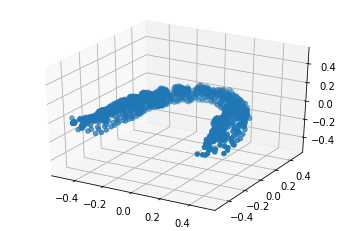

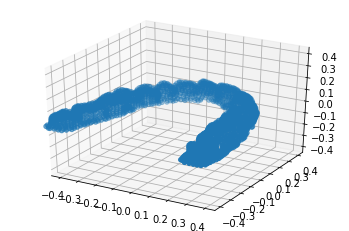

In [ ]:
FakePCs=(FakePCs + (-0.5)) / (0.5 - (-0.5))
plot(FakePCs[0])
plot(pointsAE[0])

In [ ]:
AE2=[]
#Train/Test/Val
for i in tqdm(range(len(pointsAE))):
  AE2.append(pointsAE[i])
#Validation
for i in tqdm(range(len(FakePCs))):
  AE2.append(FakePCs[i])
AE2=np.array(AE2)
np.save('PC_Arrays/Points-AE2'+str(AE2.shape)+'.npy', AE2)
AE2.shape

  0%|          | 0/255 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

(1255, 2048, 3)

In [ ]:
ext='2021-09-10 19:57:24.017751'
'''directory = r'/content/gdrive/MyDrive/MSEC2022/MoldScan/2048Samples/'+ext+'/'
list_point_clouds=[None]*120
i=0
for filename in os.listdir(directory):
  list_point_clouds[i]=str(os.path.join(directory, filename))
  i=i+1'''
pointsAE = np.load('./PC_Arrays/Points-AE2'+str(AE2.shape)+'.npy',allow_pickle=True)
#pointsAE = pointsAE[0:30]

In [ ]:
pointsAE.shape
#pointsAE= (pointsAE + (-0.5)) / (0.5 - (-0.5))

(1255, 2048, 3)

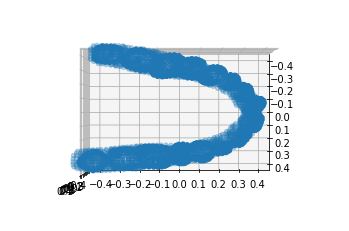

In [ ]:
plot(pointsAE[0]*Rx(0/fac),True)

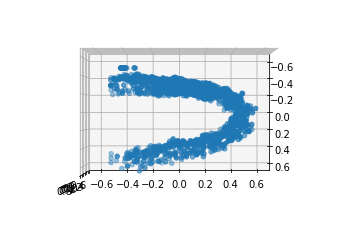

In [ ]:
plot(pointsAE[-1]*Rx(0/fac),True)

In [ ]:
X_train_prev=pointsAE[45:]
X_test=pointsAE[15:30] #Validation Dataset
train_idx=[]
for i in range(pointsAE.shape[0]):
  if i<15 or i>=45:
    train_idx.append(i)
X_train_prev=pointsAE[train_idx]
print(len(X_train_prev),len(X_test))

1225 15


1240

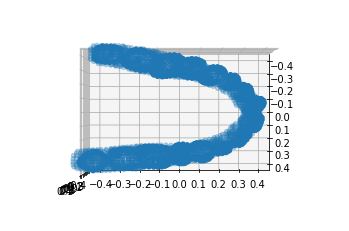

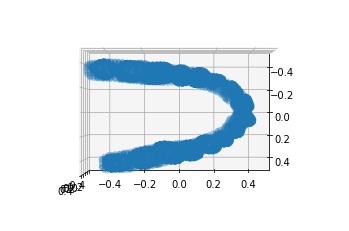

In [ ]:
X_train=[]
for i in range(len(X_train_prev)):
  X_train.append(X_train_prev[i])
  if i<15 and mirror==True:
    X_train.append(Mirror(X_train_prev[i]))
X_train=np.array(X_train)
plot(X_train[0],True)
plot(X_train[1],True)
len(X_train)

In [ ]:
X_train[0]

array([[-0.4072197 , -0.40352905,  0.0192156 ],
       [-0.42983444, -0.23991345,  0.01805895],
       [ 0.07106469,  0.33999702,  0.03585588],
       ...,
       [-0.00810322,  0.31540198, -0.0006453 ],
       [-0.27077191,  0.01457777, -0.01318189],
       [ 0.31337683, -0.16565657,  0.03385327]])

In [ ]:
X_train[1]

array([[ 0.4072197 , -0.40352905,  0.0192156 ],
       [ 0.42983444, -0.23991345,  0.01805895],
       [-0.07106469,  0.33999702,  0.03585588],
       ...,
       [ 0.00810322,  0.31540198, -0.0006453 ],
       [ 0.27077191,  0.01457777, -0.01318189],
       [-0.31337683, -0.16565657,  0.03385327]])

In [ ]:
X_train=shuffle(X_train,random_state=42)

In [ ]:
X_train

array([[[ 7.24177361e-02,  3.99434865e-01,  3.66947651e-02],
        [-4.64460850e-01, -2.29764968e-01, -3.11435461e-02],
        [ 3.24047565e-01, -5.00000000e-01, -5.73048592e-02],
        ...,
        [-4.20144916e-01, -1.99180841e-03, -1.24410987e-02],
        [-2.12270260e-01,  1.53861582e-01,  3.29712629e-02],
        [ 1.64536834e-02,  3.91994476e-01, -3.16273570e-02]],

       [[ 2.41425931e-01,  5.60566425e-01,  9.54272747e-02],
        [-3.52678120e-01, -1.39927417e-01, -1.52567923e-02],
        [ 6.89911366e-01, -5.00000000e-01, -1.87669396e-02],
        ...,
        [-3.01731944e-01,  2.16155767e-01,  7.23203421e-02],
        [-1.86042935e-01,  2.82016277e-01,  5.68000078e-02],
        [ 1.79489970e-01,  5.39813042e-01,  2.99968123e-02]],

       [[ 9.82985497e-02,  4.18485761e-01,  6.06372356e-02],
        [-4.52290416e-01, -2.20605969e-01, -4.65170741e-02],
        [ 3.14622641e-01, -4.95768428e-01, -8.37578773e-02],
        ...,
        [-3.83336812e-01,  1.80858374e-02,

In [ ]:
points=X_train
points_normalized = (points - (-0.5)) / (0.5 - (-0.5))

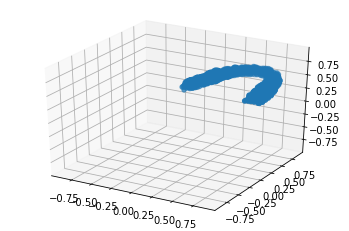

In [ ]:
plot(points_normalized[0])

(0.0, 1.0)

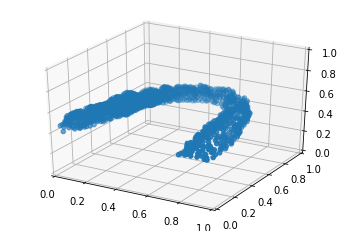

In [ ]:
input=points_normalized[0]
  #inputt = points[0,:,:]
  #inputt = inputt.permute([1,0]).detach().cpu().numpy()
fig = plt.figure()
ax_x = fig.add_subplot(111, projection='3d')
x_ = input
ax_x.scatter(x_[:, 0], x_[:, 1], x_[:,2])
ax_x.set_xlim([0,1])
ax_x.set_ylim([0,1])
ax_x.set_zlim([0,1])

In [ ]:
a=[]
a.append(X_train)
a.append(X_test)
np.save('./PC_Arrays/GAN-1-'+str(X_train.shape)+'.npy',a)

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
a = np.load('./PC_Arrays/GAN-1-'+str(X_train.shape)+'.npy',allow_pickle=True)
X_train=a[0]
X_test=a[1]
print(len(X_train),len(X_test))

1240 15


In [ ]:
class PointcloudDatasetAE(Dataset):
    def __init__(self, root, list_point_clouds):
        self.root = root
        self.list_files = list_point_clouds
        
    def __len__(self):
        return len(self.list_files)

    def __getitem__(self, index):
        points = PyntCloud.from_file(self.list_files[index])
        points.points=points.points[0:2048]
        cx=points.centroid[0]
        cy=points.centroid[1]
        cz=points.centroid[2]
        points = np.array(points.points)
        points=points[:,[0,1,2]]
        points=MoveScale3D(points,-cx,-cy,-cz,1)
        points=points/(2*np.max(points))
        points_normalized = (points - (-0.5)) / (0.5 - (-0.5))
        points = points_normalized.astype(np.float)
        points = torch.from_numpy(points)
        
        return points

In [ ]:
DATA_DIR=''
train_dataset = PointcloudDatasetNoisy(DATA_DIR, X_train)
train_dataloader = DataLoader(train_dataset, num_workers=2, shuffle=False, batch_size=batch_size)

test_dataset = PointcloudDatasetNoisy(DATA_DIR, X_test)
test_dataloader = DataLoader(test_dataset, num_workers=2, shuffle=False, batch_size=1)

In [ ]:
a1=train_dataset[0].detach().cpu().numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


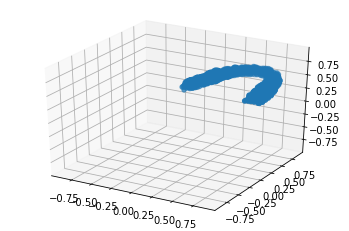

In [ ]:
plot(a1)

(0.0, 1.0)

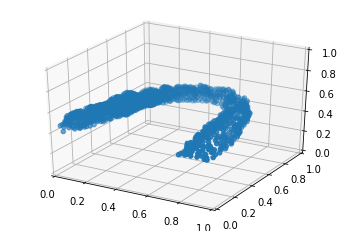

In [ ]:
input=a1
  #inputt = points[0,:,:]
  #inputt = inputt.permute([1,0]).detach().cpu().numpy()
fig = plt.figure()
ax_x = fig.add_subplot(111, projection='3d')
x_ = input
ax_x.scatter(x_[:, 0], x_[:, 1], x_[:,2])
ax_x.set_xlim([0,1])
ax_x.set_ylim([0,1])
ax_x.set_zlim([0,1])

## Test Chamfer

In [ ]:
for i,data in enumerate(train_dataloader):
  print(i)
  if i==0:
    x= data.float().to(device)
    print(x.shape)
  if i==1:
    y = data.float().to(device)
    loss_chamf,_=chamfer_distance(x,y)
    print(loss_chamf)
    break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


0
torch.Size([40, 2048, 3])
1
tensor(0.0070, device='cuda:0')


In [ ]:
for i,data in enumerate(train_dataloader):
  print(i)
  data = data.float().to(device)
  out_data, gfv = autoencoder(data)
  loss,_=chamfer_distance(data,out_data)
  print(loss)
  if i==4:
    break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


0
tensor(0.2101, device='cuda:0', grad_fn=<AddBackward0>)
1
tensor(0.2188, device='cuda:0', grad_fn=<AddBackward0>)
2
tensor(0.1990, device='cuda:0', grad_fn=<AddBackward0>)
3
tensor(0.2254, device='cuda:0', grad_fn=<AddBackward0>)
4
tensor(0.2036, device='cuda:0', grad_fn=<AddBackward0>)


# Training

## Optimizer

In [ ]:
optimizer_AE = torch.optim.Adam(autoencoder.parameters(), lr=lr, betas=(momentum, 0.999))

In [ ]:
start_epoch=0
cost_list=[]
cost_val_list=[]
gfv_list=[]
chamf_list=[]
chamf_list_test=[]
runot=False
ext='Orginal+Mirrored-254-[[128 128 256 128]]-[[ 128  128  128  256 6144]]-49-0.8-0.0005-2048-30'
typeFile='Best_Val'
filename='/content/gdrive/MyDrive/MSEC2022/MoldScan/MoldScanAE/'+ext+'/models/'+typeFile+'_ae_.pth.tar'
filename

'/content/gdrive/MyDrive/MSEC2022/MoldScan/MoldScanAE/Orginal+Mirrored-254-[[128 128 256 128]]-[[ 128  128  128  256 6144]]-49-0.8-0.0005-2048-30/models/Best_Val_ae_.pth.tar'

In [ ]:
if runot==True:
  autoencoder, optimizer_AE, start_epoch,cost_list,cost_val_list,gfv_list,chamf_list,OUTPUTS_DIR= load_checkpoint(autoencoder, optimizer_AE,filename=filename)
  for state in optimizer_AE.state.values():
    for k, v in state.items():
      if isinstance(v, torch.Tensor):
        state[k] = v.to(device)

## Summary Writer and Training Code

In [ ]:
ROOT_DIR = './MoldScanAE/'
now =   str(datetime.datetime.now())
dirf=ROOT_DIR+'Orginal+Mirrored-'+str(len(X_train))+'-'+str(lay)+'-'+str(layD)+'-'+str(batch_size)+'-'+str(momentum)+'-'+str(lr)+'-'+str(num_points)+'-'+str(wgfv)
if not os.path.exists(ROOT_DIR):
    os.makedirs(ROOT_DIR)

if not os.path.exists(dirf):
    os.makedirs(dirf)

LOG_DIR = dirf + '/logs/'
if not os.path.exists(LOG_DIR):
    os.makedirs(LOG_DIR)

OUTPUTS_DIR = dirf+ '/outputs/'
if not os.path.exists(OUTPUTS_DIR):
    os.makedirs(OUTPUTS_DIR)

txt_DIR = dirf+ '/txt/'
if not os.path.exists(txt_DIR):
    os.makedirs(txt_DIR)

ply_DIR = dirf+ '/ply/'
if not os.path.exists(ply_DIR):
    os.makedirs(ply_DIR)

MODEL_DIR = dirf + '/models/'
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

summary_writer = SummaryWriter(LOG_DIR)

In [ ]:
print('Training')
N_test=len(X_test)
k=0
ac=0
lrates_lists=[]
min=100000000
min2=100000000
for epoch in range(start_epoch,n_epochs):
    cost_ac=0
    gfv_ac=0
    chamf_ac=0
    autoencoder.train()
    for i, data in enumerate(train_dataloader):
        data = data.float().to(device)
        #clear gradient
        optimizer_AE.zero_grad()
        #make prediction
        out_data, gfv = autoencoder(data)
        #calculate loss
        autoencoder.eval()
        with torch.no_grad():
          gfv2 = autoencoder.encoder(out_data)
        loss_gfv=F.mse_loss(gfv2, gfv)
        loss_chamf,_=chamfer_distance(data,out_data)
        loss=loss_chamf*100+loss_gfv*wgfv
        #loss=loss_chamf*100
        #calculate gradients of parameters
        loss.backward()
        #update parameters
        optimizer_AE.step()
        cost_ac+=loss.item()
        chamf_ac+=loss_chamf.item()
        gfv_ac=loss_gfv.item()
        #print('Epoch: {}, Iteration: {}, Content Loss: {}'.format(epoch, i, loss.item()))
        summary_writer.add_scalar('Content Loss', loss.item())
    #acummulate cost 
    gfv_list.append(gfv_ac/(i+1))
    chamf_list.append(chamf_ac/(i+1))
    cost_list.append(cost_ac/(i+1))
    #perform a prediction on the validation data  
    cost_tst=0
    chamf_ac_test=0
    #for j, data1 in enumerate(test_dataloader):
    for i, data1 in enumerate(test_dataloader):
      #data1 = data1.permute([0,2,1]).float().to(device)
      '''points = PyntCloud.from_file(X_test[j])
      points = np.array(points.points[0:2048])
      points=  points[:,[0,1,2]]
      points_normalized = (points - (-0.5)) / (0.5 - (-0.5))
      points = points_normalized.astype(np.float)
      points = torch.from_numpy(points).unsqueeze(0)
      points = points.float().to(device)'''
      points = data1.float().to(device)
     #make prediction
      autoencoder.eval()
      with torch.no_grad():
        outst_data, gfv = autoencoder(points)
      with torch.no_grad():
        gfv2 = autoencoder.encoder(outst_data)
      loss_gfv_tst=F.mse_loss(gfv2, gfv)
      #outst_data, gfvst = autoencoder(data1)
     #calculate loss
      loss_chamf_test,_=chamfer_distance(points,outst_data)
      loss_test=loss_chamf_test*100+loss_gfv_tst*wgfv
      #loss_test=loss_chamf_test
      #loss_tst = chamfer_loss(outst_data, data1)
      #print('Epoch: {}, Iteration: {}, Validation Loss: {}'.format(epoch, i, loss_tst.item()))
    #update parameters
      cost_tst+=loss_test.item()
      chamf_ac_test+=loss_chamf_test.item()
    #acummulate cost
    cost_val_list.append(cost_tst/(i+1))
    chamf_list_test.append(chamf_ac_test/(i+1))
    #save model
    if epoch<50:
      idxmin=0
      idxmin2=0
      print("Starting:",epoch,"/50")
    if epoch>50:
      print('Epoch: {}, Training Loss: {},min at:{}, with a chamfer loss of:{}'.format(epoch,cost_list[idxmin],idxmin,chamf_list[idxmin]))
      print('Epoch: {}, Validation Loss: {},min at:{},with a chamfer loss of:{}'.format(epoch,cost_val_list[idxmin2],idxmin2,chamf_list_test[idxmin2]))
      if cost_val_list[epoch]<min:
        min=cost_val_list[epoch]
        idxmin2=epoch
        #torch.save(autoencoder.state_dict(), MODEL_DIR+'{}_ae_.pt'.format(epoch))
        state = {'epoch': epoch, 'state_dict': autoencoder .state_dict(),
             'optimizer': optimizer_AE.state_dict(), 'Training_Loss': cost_list,'Validation_Loss':cost_val_list,
             'Chamfer_Loss':chamf_list,'GFV':gfv_list,'Out_dir':OUTPUTS_DIR}
        torch.save(state, MODEL_DIR+'Best_Val_ae_.pth.tar')

      if cost_list[epoch]<min2:
        min2=cost_list[epoch]
        idxmin=epoch
        #torch.save(autoencoder.state_dict(), MODEL_DIR+'{}_ae_.pt'.format(epoch))
        state = {'epoch': epoch, 'state_dict': autoencoder.state_dict(),
             'optimizer': optimizer_AE.state_dict(), 'Training_Loss': cost_list,'Validation_Loss':cost_val_list,
             'Chamfer_Loss':chamf_list,'GFV':gfv_list,'Out_dir':OUTPUTS_DIR}
        torch.save(state, MODEL_DIR+'Best_Train_ae_.pth.tar')
    #Reduce learning rate accordingly
    #optimizer_AE.param_groups[0]['lr'] =lr * (1 / (1 + decay * epoch))
#torch.save(autoencoder.state_dict(), MODEL_DIR+'{}_ae_.pt'.format(epoch))
state = {'epoch': epoch + 1, 'state_dict': autoencoder.state_dict(),
'optimizer': optimizer_AE.state_dict(), 'Training_Loss': cost_list,'Validation_Loss':cost_val_list,
'Chamfer_Loss':chamf_list,'GFV':gfv_list,'Out_dir':OUTPUTS_DIR}
torch.save(state, MODEL_DIR+'Final_ae_.pth.tar')

Output hidden; open in https://colab.research.google.com to view.

## Plot Training and Testing Loss

In [ ]:
dirf

'./MoldScanAE/Orginal+Mirrored-1240-[[128 128 256 128]]-[[ 128  128  128  256 6144]]-40-0.8-0.0005-2048-30'

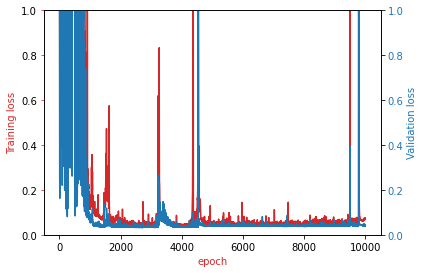

In [ ]:

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('Training loss',color=color)
ax1.tick_params(axis='y', color=color)
ax1.set_ylim(0,1)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Validation loss', color=color)  
ax2.plot( cost_val_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
ax2.set_ylim(0,1)
ROOT_DIR = './MoldScanAE/'
figname=MODEL_DIR+'AECosts-1-.png'
fig.savefig(figname)

In [ ]:
figname

'./MoldScanAE/Orginal+Mirrored-1240-[[128 128 256 128]]-[[ 128  128  128  256 6144]]-40-0.8-0.0005-2048-30/models/AECosts-1-.png'

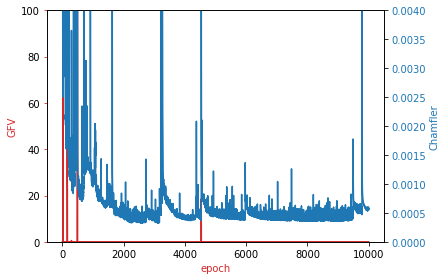

In [ ]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(gfv_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('GFV',color=color)
ax1.set_ylim(0,100)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Chamfler', color=color)  
ax2.plot( chamf_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
ax2.set_ylim(0,0.004)
figname=MODEL_DIR+'AECosts-2-.png'
fig.savefig(figname)

In [ ]:
upb=n_epochs-1
lbd=49
idxmin=lbd+np.argmin(cost_list[lbd:upb])
val_err=cost_val_list[idxmin]
tr_err=cost_list[idxmin]
print("The best iteration was:",idxmin,"whith an validation loss of:",val_err, "and a training loss off:",tr_err)

The best iteration was: 3121 whith an validation loss of: 0.033532175421714785 and a training loss off: 0.03262933055239339


In [ ]:
upb=n_epochs-1
lbd=49
idxmin=lbd+np.argmin(cost_val_list[lbd:upb])
val_err=cost_val_list[idxmin]
tr_err=cost_list[idxmin]
print("The best iteration was:",idxmin,"whith an validation loss of:",val_err, "and a training loss off:",tr_err)

The best iteration was: 2674 whith an validation loss of: 0.03266822509467602 and a training loss off: 0.03588035774807776


In [ ]:
print("Encoder:",lay,"Decoder:",layD,"Batch:",batch_size,"Error:",val_err,"Best at:",idxmin,"Learnig rate:",lr,"Mom:",momentum)

Encoder: [[128 128 256 128]] Decoder: [[ 128  128  128  256 6144]] Batch: 40 Error: 0.03266822509467602 Best at: 2674 Learnig rate: 0.0005 Mom: 0.8


In [ ]:
np.argmin(cost_val_list)

2674

In [ ]:
chamf_list_test[np.argmin(cost_val_list)]

0.0003235698328353465

# Results

In [ ]:
now =   str(datetime.datetime.now())
directory_ResAE=OUTPUTS_DIR 
if not os.path.exists(directory_ResAE):
    os.makedirs(directory_ResAE)

In [ ]:
OUTPUTS_DIR

'./MoldScanAE/Orginal+Mirrored-240-[[128 128 256 128]]-[[ 128  128  128  256 6144]]-10-0.8-0.0005-2048-30/outputs/'

In [ ]:
lim=20
ct=0
for i, data1 in enumerate(test_dataloader):
        points = data1.float().to(device)
        print(points.shape)

        autoencoder.eval()

        with torch.no_grad():
                out_data, gfv = autoencoder(points)
                loss,_=chamfer_distance(out_data,points)
        print(loss.item())
        ct=ct+loss.item()
                
        out_data=out_data.permute([0,2,1])
        output = out_data[0,:,:]
        output = output.permute([1,0]).detach().cpu().numpy()

        points=points.permute([0,2,1])
        inputt = points[0,:,:]
        inputt = inputt.permute([1,0]).detach().cpu().numpy()

        fig = plt.figure()
        ax_x = fig.add_subplot(111, projection='3d')
        x_ = output
        ax_x.scatter(x_[:, 0], x_[:, 1], x_[:,2])
        ax_x.set_xlim([0,1])
        ax_x.set_ylim([0,1])
        ax_x.set_zlim([0,1])
        #fig.savefig(directory_ResAE+'/{}_{}.png'.format(i, 'out'))
        df = pd.DataFrame(x_, columns=['X axis', 'Y axis', 'Z axis'])
        namefile=str(i)+':AE.txt'
        df.to_csv(r'.'+txt_DIR[1:]+namefile, header=None, index=None, sep=' ', mode='a')
        fig.savefig(OUTPUTS_DIR+'/{}_{}.png'.format(i, 'AE'))

        fig = plt.figure()
        ax_x = fig.add_subplot(111, projection='3d')
        x_ = inputt
        ax_x.scatter(x_[:, 0], x_[:, 1], x_[:,2])
        ax_x.set_xlim([0,1])
        ax_x.set_ylim([0,1])
        ax_x.set_zlim([0,1])
        #fig.savefig(directory_ResAE+'/{}_{}.png'.format(i, 'in'))
        df = pd.DataFrame(x_, columns=['X axis', 'Y axis', 'Z axis'])
        namefile=str(i)+':Org.txt'
        df.to_csv(r'.'+txt_DIR[1:]+namefile, header=None, index=None, sep=' ', mode='a')
        fig.savefig(OUTPUTS_DIR+'/{}_{}.png'.format(i, 'Org'))
print(ct/(i+1))
        #if i==lim:
         # break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


torch.Size([1, 2048, 3])
0.00023043242981657386
torch.Size([1, 2048, 3])
0.00030389672610908747
torch.Size([1, 2048, 3])
0.00024522171588614583
torch.Size([1, 2048, 3])
0.00031841854797676206
torch.Size([1, 2048, 3])
0.00020522701379377395


In [ ]:
i

In [ ]:
list_point_clouds=listDir(txt_DIR)
list_point_clouds=np.sort(list_point_clouds)
for i in range(len(list_point_clouds)):
  nameply='None.ply'
  cloud = PyntCloud.from_file(list_point_clouds[i],sep=" ",names=["x","y","z"])
  if (list_point_clouds[i].find('AE')!=-1):
    nameply=str(np.ceil((i+1)/2)-1)+':AE.ply'
  if (list_point_clouds[i].find('Org')!=-1):
    nameply=str(np.ceil((i+1)/2)-1)+':Org.ply'
  cloud.to_file(ply_DIR+nameply)
  

In [ ]:
size=np.array([[205,190,327]])
w_gfv=np.array([[30,30,30]])
err=np.array([[0.0003023050,0.00030230507836677135,]])